In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import csv

In [2]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [3]:
df = pd.read_csv('./UserBehavior.csv',
                 names=['user_id','item_id','category_id','behavior_type','timestamp'],
                 header=None,
                 iterator=True)

In [3]:
def read_data(data,chunkSize=10000000):
    """分成1千万行为一段的读取数据"""
    try:
        chunk = data.get_chunk(chunkSize)
        return chunk
    except StopIteration:
        print('Iteration is stopped.')
        return 0

    
def save_data(data, val):
    """将处理后的数据写入文件"""
    if not os.path.isdir('./preprocess'):
        os.mkdir('./preprocess')
        
    filepath='./preprocess/UserBehavior_'+str(val)+'.csv'
    data.to_csv(filepath, index=False, encoding='utf8',header=False)

    
def merge_file(dirpath='./preprocess/'):
    """将分成一段段的文件合并成一个文件"""
    listdir = os.listdir('./preprocess/')
    
    for filepath in listdir:
        with open('./UserBehavior_.csv', 'a',encoding='utf8') as w_file,open(dirpath+filepath, 'r',encoding='utf8') as r_file:
            print('正在写入：',filepath, '到UserBehavior_.csv')
            reader = csv.reader(r_file)
            writer = csv.writer(w_file)
            writer.writerows(reader)

# 观察数据

In [5]:
%%time
chunk = read_data(df) # 获取一千万行数据
print(chunk.head())

   user_id  item_id  category_id behavior_type   timestamp
0        1  2268318      2520377            pv  1511544070
1        1  2333346      2520771            pv  1511561733
2        1  2576651       149192            pv  1511572885
3        1  3830808      4181361            pv  1511593493
4        1  4365585      2520377            pv  1511596146
Wall time: 4.24 s


In [6]:
# 查看缺失值
chunk.isnull().any()

user_id          False
item_id          False
category_id      False
behavior_type    False
timestamp        False
dtype: bool

In [7]:
# 查看数据的总体情况
chunk.describe()
# 时间戳最小值存在负值，这个是有问题，在数据清洗阶段，需要清洗。

,user_id,item_id,category_id,timestamp
count,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07
mean,3.151168e+05,2.579448e+06,2.706506e+06,1.511952e+09
std,1.976828e+05,1.487640e+06,1.464218e+06,6.058377e+06
min,1.000000e+00,3.000000e+00,1.147000e+03,-2.034497e+09
25%,1.773220e+05,1.295395e+06,1.338377e+06,1.511762e+09
50%,3.033830e+05,2.579668e+06,2.693696e+06,1.511965e+09
75%,4.289120e+05,3.861127e+06,4.145813e+06,1.512180e+09
max,1.018011e+06,5.163067e+06,5.162429e+06,2.122867e+09


# 数据清洗

In [8]:
## 查看用户行为里有没有异常值
# chunk.behavior_type.value_counts() # 没有异常值

In [9]:
%%time
val = 1 # 保存文件时命名文件需要
while type(chunk) != int:
    # 根据日期数据，构建新的特征：date,time
    datetimes = pd.to_datetime(chunk.timestamp, unit='s', origin=pd.Timestamp('1970-01-01 08:00:00')) # 将时间戳转换为日期，注：中国要+8：00
    # datetimes[(datetimes<pd.to_datetime('2017/11/25')) | (datetimes>=pd.to_datetime('2017/12/04'))] # 约有123573行是24日的，数据提供的范围在1月25日到2月3日之间
    datetimes = datetimes[(datetimes>=pd.to_datetime('2017/11/25')) & (datetimes<pd.to_datetime('2017/12/04'))] # 通过限定日期范围，过滤掉异常值
    
    chunk['date'] = datetimes.dt.date # 操作时间是哪一天
    chunk['hour'] = datetimes.dt.hour # 操作时间是哪个小时
    # chunk.hour.value_counts(sort=False).sort_index().plot() # 查看下大致的趋势
    print(chunk.head(1)) # 检查各分段数据是否相同
    
    save_data(chunk, val) # 保存处理后的数据
    chunk = read_data(df) # 再次获取一千万行数据
    val+=1
    # break

   user_id  item_id  category_id behavior_type   timestamp        date  hour
0        1  2268318      2520377            pv  1511544070  2017-11-25   1.0
          user_id  item_id  category_id behavior_type   timestamp        date  \
10000000   536993  1640326      1689352            pv  1511934444  2017-11-29   

          hour  
10000000  13.0  
          user_id  item_id  category_id behavior_type   timestamp        date  \
20000000  1002513  1538157      1045172            pv  1511883358  2017-11-28   

          hour  
20000000  23.0  
          user_id  item_id  category_id behavior_type   timestamp        date  \
30000000   540429  1321782      3002561           fav  1511567890  2017-11-25   

          hour  
30000000   7.0  
          user_id  item_id  category_id behavior_type   timestamp        date  \
40000000  1003180  4117678       902410            pv  1511540909  2017-11-25   

          hour  
40000000   0.0  
          user_id  item_id  category_id behavior_type   ti

In [10]:
%%time
# 合并数据
merge_file()

正在写入： UserBehavior_1.csv 到UserBehavior_.csv
正在写入： UserBehavior_10.csv 到UserBehavior_.csv
正在写入： UserBehavior_11.csv 到UserBehavior_.csv
正在写入： UserBehavior_2.csv 到UserBehavior_.csv
正在写入： UserBehavior_3.csv 到UserBehavior_.csv
正在写入： UserBehavior_4.csv 到UserBehavior_.csv
正在写入： UserBehavior_5.csv 到UserBehavior_.csv
正在写入： UserBehavior_6.csv 到UserBehavior_.csv
正在写入： UserBehavior_7.csv 到UserBehavior_.csv
正在写入： UserBehavior_8.csv 到UserBehavior_.csv
正在写入： UserBehavior_9.csv 到UserBehavior_.csv
Wall time: 5min 44s


# 数据分析

In [4]:
df = pd.read_csv('./UserBehavior_.csv',
                 names=['user_id','item_id','category_id','behavior_type','timestamp','date','hour'],
                 header=None,
                 iterator=True)

In [5]:
chunk = read_data(df) # 读取一千万行数据

In [6]:
chunk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 7 columns):
user_id          int64
item_id          int64
category_id      int64
behavior_type    object
timestamp        int64
date             object
hour             float64
dtypes: float64(1), int64(4), object(2)
memory usage: 534.1+ MB


In [7]:
chunk.date = pd.to_datetime(chunk.date) # 将date转成datetime

## pv uv 平均访问量

In [8]:
pv = chunk[chunk.behavior_type=='pv'].user_id.count() # pv
uv = chunk.user_id.drop_duplicates().count() #  #去重后的用户数
print('pv:%d，uv:%d，平均访问量:%d'%(pv,uv,pv/uv))

pv:8950064，uv:97811，平均访问量:91


## 用户跳出率

In [9]:
tmp_pv = chunk[chunk.behavior_type=='pv'].user_id.drop_duplicates()
tmp_cart = chunk[chunk.behavior_type=='cart'].user_id.drop_duplicates()
tmp_fav = chunk[chunk.behavior_type=='fav'].user_id.drop_duplicates()
tmp_buy = chunk[chunk.behavior_type=='buy'].user_id.drop_duplicates()

In [10]:
tmp = tmp_pv.count()
tmp_pv.index = tmp_pv.values
tmp_pv = tmp_pv.drop(pd.Index(tmp_cart.values),errors='ignore')
tmp_pv = tmp_pv.drop(pd.Index(tmp_fav.values),errors='ignore')
tmp_pv = tmp_pv.drop(pd.Index(tmp_buy.values),errors='ignore')
print('跳出率：%.2f%%'%(tmp_pv.count()/tmp *100))

跳出率：5.76%


## 每个时间段的访问量和用户数

In [57]:
tmp_pv = chunk[chunk.behavior_type=='pv'].groupby('hour').behavior_type.count()
tmp_user = chunk.drop_duplicates('user_id').groupby('hour').user_id.count()

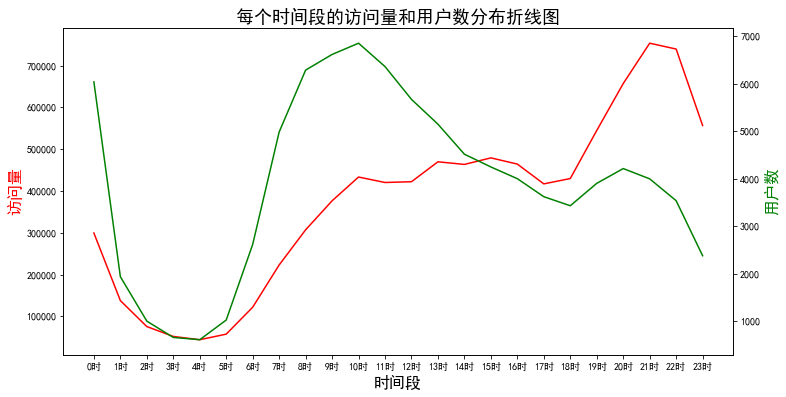

In [77]:
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.plot(['0时','1时','2时','3时','4时','5时','6时','7时','8时','9时','10时','11时','12时','13时','14时','15时','16时','17时','18时','19时','20时','21时','22时','23时'],
         tmp_pv,color='r')
ax2 = ax1.twinx()
ax2.plot(tmp_user,color='g')

ax1.set_xlabel('时间段',fontsize=16)
ax1.set_ylabel('访问量', color='r',fontsize=16)
ax2.set_ylabel('用户数', color='g',fontsize=16)

plt.title('每个时间段的访问量和用户数分布折线图', fontsize=18)
plt.show()

## 转化率

In [12]:
pv = chunk[chunk.behavior_type=='pv'].user_id.count()
cart = chunk[chunk.behavior_type=='cart'].user_id.count()
fav = chunk[chunk.behavior_type=='fav'].user_id.count()
buy = chunk[chunk.behavior_type=='buy'].user_id.count()
print('点击量:100%%, 收藏或加入购物车:%.2f%%, 购买: %.2f%%' % ((fav+cart)/pv*100, buy/pv*100))

点击量:100%, 收藏或加入购物车:9.51%, 购买: 2.23%


## 成交量

Text(0, 0.5, '成交量')

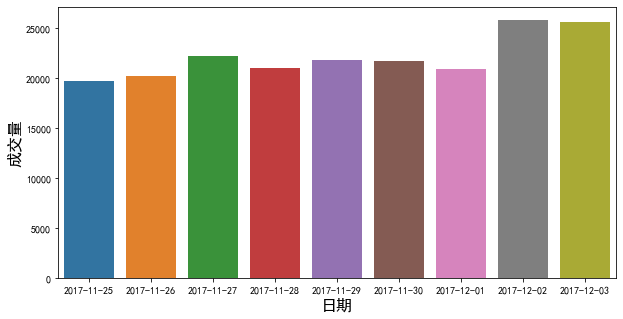

In [38]:
vol = chunk[chunk.behavior_type=='buy'].groupby('date').behavior_type.count() # 成交量
plt.figure(figsize=(10,5))
sns.barplot(vol.index, vol.values)
plt.xlabel("日期",fontsize=16)
plt.ylabel("成交量",fontsize=16)

## 复购率

In [39]:
buy = chunk[chunk.behavior_type=='buy'].user_id.drop_duplicates().count() # 总购买用户数
tmp = chunk[chunk.behavior_type=='buy'].groupby('user_id').user_id.count() # 按id分类，统计每个id的购买次数
tmp = tmp[tmp>=2].count() # 统计出购买两次以上的id
print('复购率：%.2f%%'%(tmp/buy * 100))

复购率：66.01%


## 购买商品排行榜

In [80]:
item= chunk[chunk.behavior_type=='buy'].groupby('item_id').item_id.count().sort_values(ascending=False)
item_rank = item.head(10)
item_rank

item_id
3122135    134
3031354     81
2964774     76
1910706     69
2560262     61
1116492     59
3964583     56
1415828     55
1168232     53
3189426     52
Name: item_id, dtype: int64

Text(0, 0.5, '购买数')

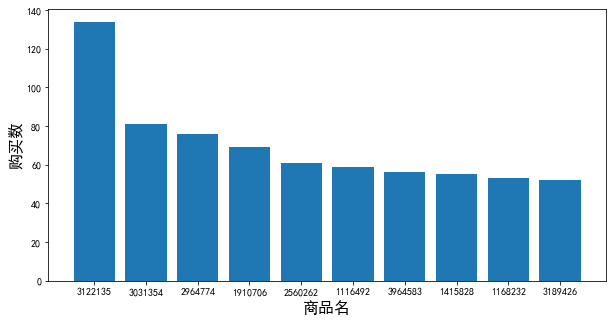

In [99]:
plt.figure(figsize=(10,5))
plt.bar(item_rank.index.astype(str),item_rank.values)
plt.xlabel("商品名",fontsize=16)
plt.ylabel("购买数",fontsize=16)

# 对用户进行分类

RFM模型是衡量客户价值和客户创利能力的重要工具。

该模型通过客户的最近<b>交易行为（Recency）、交易频率（Frequency）以及交易金额（Monetary）</b>三项指标来描述该客户的价值状况。

<b>最近一次消费(Recency)</b>：指最近一次消费离上一次消费之间的时间长短。反映客户对产品的态度以及对品牌价值的信任度，关乎消费者的存留状况。

<b>消费频率(Frequency)</b>：指某个特定时间内消费的次数。它直接反映了客户的忠诚度，消费频率越高，忠诚度就越高；忠诚度越高的客户数量越多，公司的竞争优势越强，市场份额越大。

<b>消费金额(Monetary)</b>：是指一定时间内消费某产品金额。它反映的是客户的价值，价值越高，给公司创造的利益就更大。

<b>因为数据源里没有金额相关的信息，所以，下面的分析，我是通过R和F来对客户价值进行评分。</b>

## Recency

In [157]:
# 数据集里时间范围是从11月25到12月3日，我将11月25日，设为参数对照日期，
# 即以距离11月25日的天数划分区间，其中0-2天，3-4天，5-6天，7-8天，分别对应为1-4分。
tmp = chunk[chunk.behavior_type=='buy'].drop_duplicates('user_id') # 提取出购买用户
recency = (tmp.date - pd.to_datetime('2017-11-25')).astype('timedelta64[D]') #提取天数
recency = pd.cut(recency, [-0.001,2.0,4.0,6.0,8.0],labels=[1,2,3,4]).astype(np.int64) # 划分区间
recency.index = chunk[chunk.behavior_type=='buy'].drop_duplicates('user_id').user_id # 将索引重置为user_id

## Frequency

In [158]:
# 有购买行为的用户，购买频率最高的能达到93次。所以，我们将1-100从低到高，划分为4个档次。1-25，26-50，51-75，76-7分别对应为1-4分。
frequency = chunk[chunk.behavior_type=='buy'].groupby('user_id').user_id.count() # 购买次数
frequency = pd.cut(frequency, [0,25,50,75,100],labels=[1,2,3,4]).astype(np.int64) # 划分区间

## 用户分类

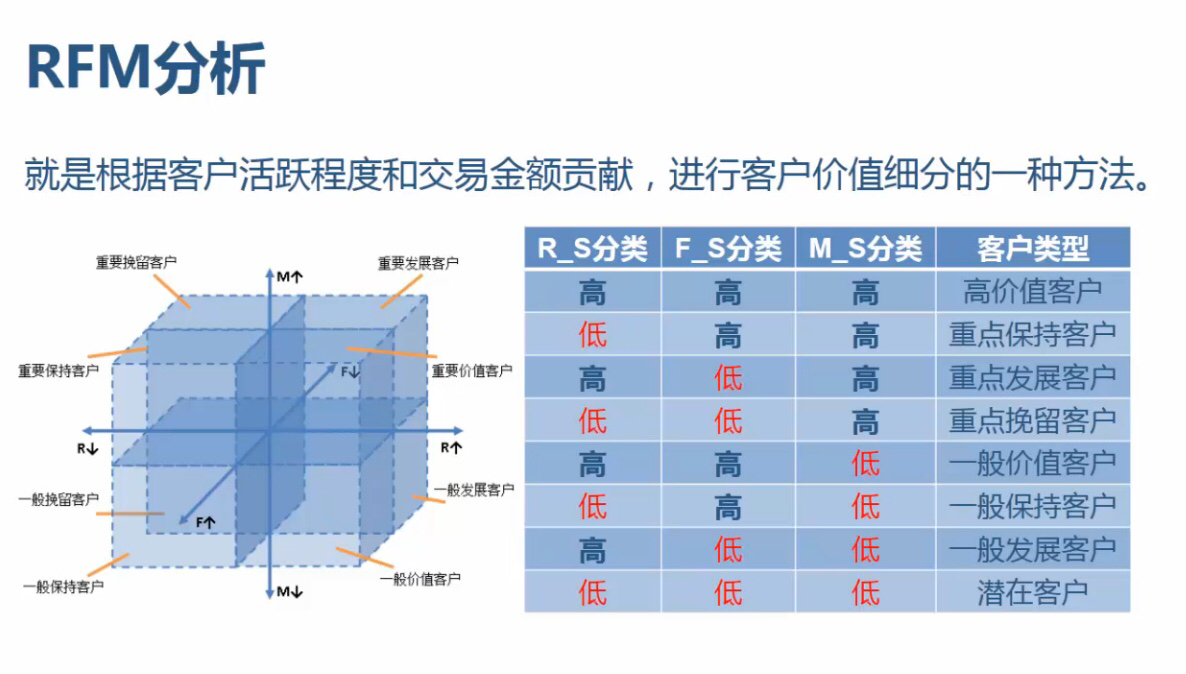

通过上面两个步骤，我已经从两个维度：最近购买时间及购买频率，分别给用户进行了评分。

接下来用这两项的每一项平均值作为判断高于还是低于，比如重要价值用户，必须是两项的分值都比平均值要高，才能作为重要价值的用户。

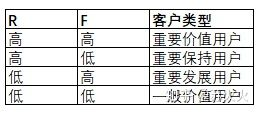

In [166]:
# 求两项评分的均值
recency_avg = recency.sum()/recency.count()
frequency_avg = frequency.sum() / frequency.count()
print('recency:%.2f，frequency:%.2f'%(recency_avg,frequency_avg))

recency:1.96，frequency:1.00


In [165]:
r_f = pd.DataFrame([recency,frequency]).T # 拼接recency, frequency
r_f.columns = ['r', 'f']
r_f.head(2)

,r,f
user_id,,
27,1,1
43,2,1


In [171]:
def func(row):
    if row['r']>=recency_avg and row['f']>=frequency_avg:
        return '重要价值用户'
    elif row['r']>=recency_avg and row['f']<frequency_avg:
        return '重要保持用户'
    elif row['r']<recency_avg and row['f']>=frequency_avg:
        return '重要发展用户'
    elif row['r']<recency_avg and row['f']<frequency_avg:
        return '一般价值用户'

user_categroy = r_f.apply(func, axis=1)

## 统计分类后的用户

In [173]:
user_categroy.value_counts(sort=False)

重要保持用户    34026
一般价值用户    32341
重要发展用户       79
重要价值用户        6
dtype: int64

对于重要价值用户，他们是最优质的用户，需要重点关注并保持， 应该提高满意度，增加留存；

对于重要保持用户，他们最近有购买，但购买频率不高，可以通过活动等提高其购买频率；

对于重要发展用户，他们虽然最近没有购买，但以往购买频率高，可以做触达，以防止流失；

对于一般价值用户，他们最近没有购买，以往购买频率也不高，特别容易流失，所以应该赠送优惠券或推送活动信息，唤醒购买意愿。

# 总结

1.12月2日，3日，相对于其他日期，流量增长明显，推测和搞活动有关；

2.大部分用户在18时到22时会比较活跃，其中21到22时，是一天当中最活跃的时段，成交量也是这一时段最高。建议可以在用户活跃的时段进行推广以使运营效果最大化。

3.这段时间复购率达到66%，说明店铺产品对用户吸引力比较大。

4.被重复购买得比较频繁的商品是item_id为3122135等商品，对于复购率高的商品，建议可以建立自己的忠实粉丝群，实行更精准的人群管理。

5.用户行为转化率只有2%，用户在浏览商品详情页后出现了大量的流失。建议通过活动、优惠券、产品详情页的改进等提高转化。

6.用RFM模型对用户进行分类后，可知重要价值用户比较少，用户类型集中于重要保持用户和一般价值用户。建议根据用户类型，进行有针对性的精准营销。